In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'text.usetex': False,
    'font.family': 'serif',
}
matplotlib.rcParams.update(params)

def colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [2]:
da = xr.open_dataset('../sandbox/outputs/dev/polynomial/cv-search-scores.nc')

In [3]:
da

<xarray.Dataset>
Dimensions:     (d_X1: 7, d_X2: 7, d_Y: 7, n: 8, poly: 1, seed: 10, semi_prop: 1)
Coordinates:
  * d_X1        (d_X1) int64 1 2 3 4 5 7 9
  * d_X2        (d_X2) int64 1 2 3 4 5 7 9
  * d_Y         (d_Y) int64 1 2 3 4 5 7 9
  * n           (n) int64 20 40 60 80 100 150 200 300
  * poly        (poly) bool True
  * seed        (seed) int64 2 3 5 7 11 13 17 19 23 29
  * semi_prop   (semi_prop) float64 0.0
Data variables:
    collider    (d_X1, d_X2, d_Y, n, poly, seed, semi_prop) float64 ...
    difference  (d_X1, d_X2, d_Y, n, poly, seed, semi_prop) float64 ...
    linreg      (d_X1, d_X2, d_Y, n, poly, seed, semi_prop) float64 ...
    most_gain   (d_X1, d_X2, d_Y, n, poly, seed, semi_prop) float64 ...
Attributes:
    fill_value:  nan

In [4]:
mean, std = da.mean(['seed']), da.std(['seed'])

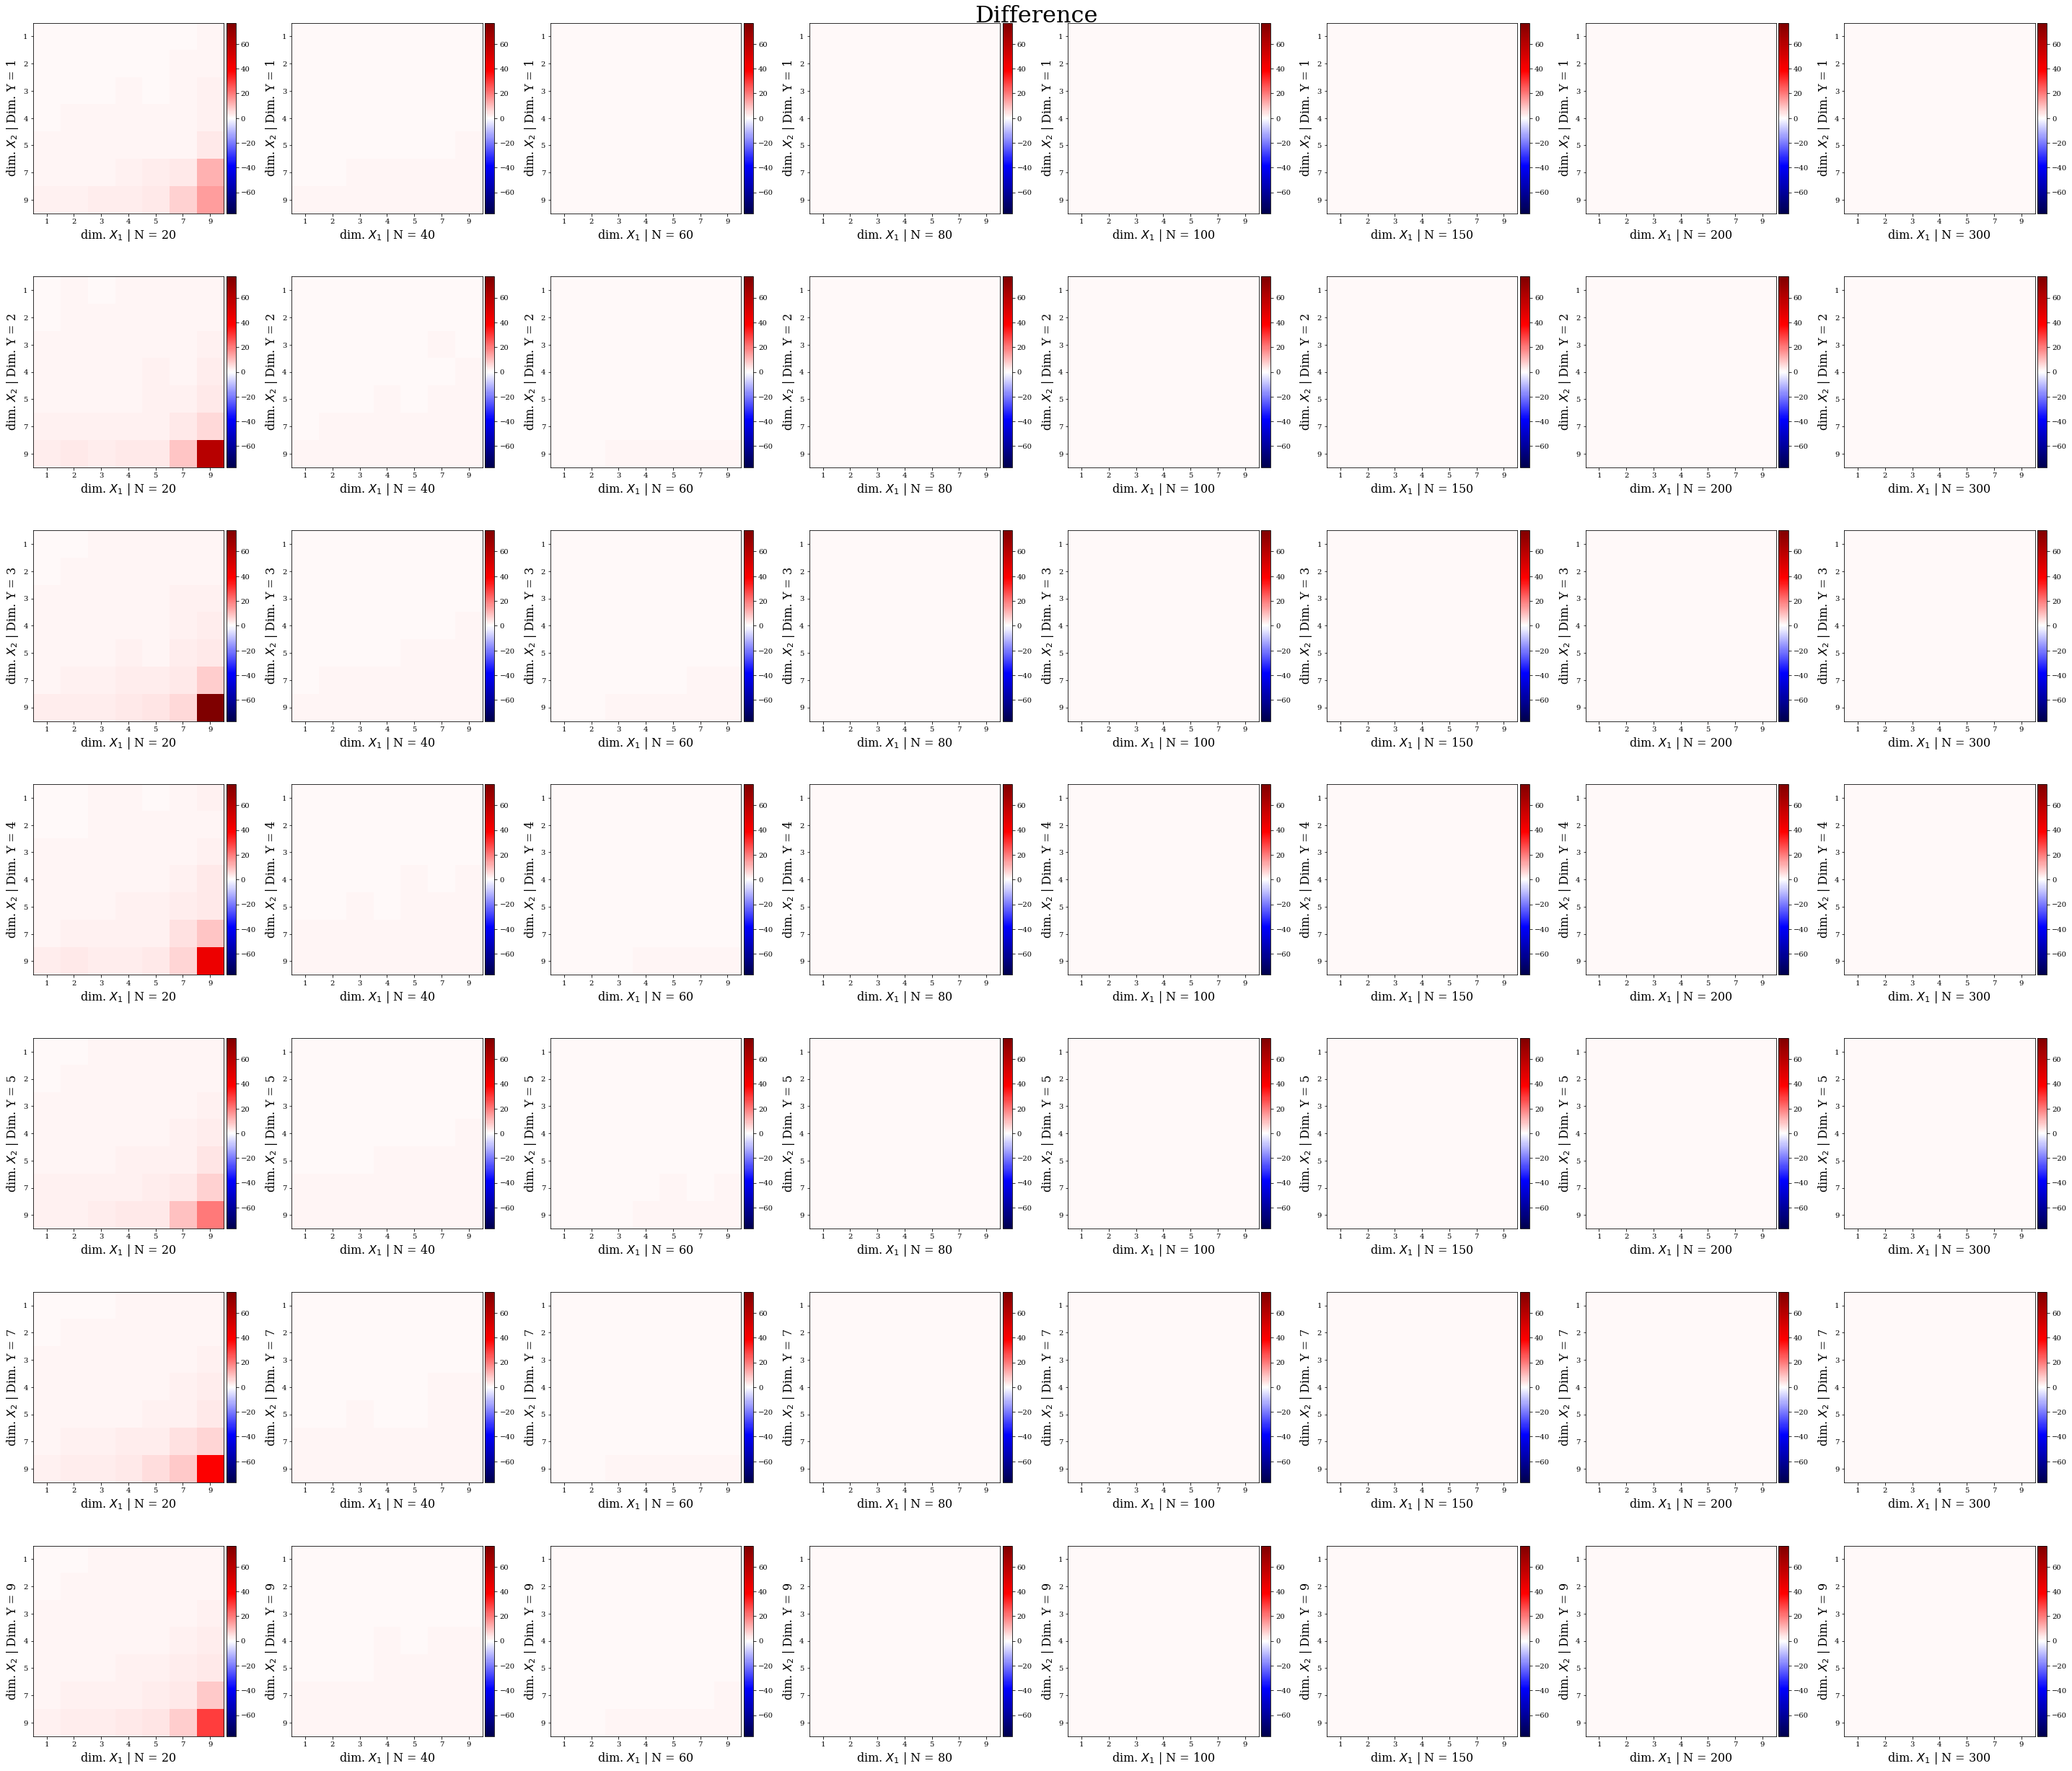

In [15]:
nrow, ncol = da.dims['d_Y'], da.dims['n']
fontsize = 16

fig, ax = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

vmax = np.percentile(mean.collider.values, q=[99])
vmax = mean.collider.values.max()
vmin = -vmax

for i in range(nrow):
    for j in range(ncol):
        d_Y = da.d_Y.isel(d_Y=i).values.item()
        n = da.n.isel(n=j).values.item()
        array = mean.sel(n=n, d_Y=d_Y).collider.values.squeeze()
        im = ax[i, j].imshow(array, vmin=vmin, vmax=vmax, cmap='seismic')
        ax[i, j].set_xticks(list(range(da.dims['d_X1'])))
        ax[i, j].set_xticklabels(da.d_X1.values)
        ax[i, j].set_xlabel(f'dim. $X_1$ | N = {n}', fontsize=fontsize)
        ax[i, j].set_yticks(list(range(da.dims['d_X2'])))
        ax[i, j].set_yticklabels(da.d_X2.values)
        ax[i, j].set_ylabel(f'dim. $X_2$ | Dim. Y = {d_Y}', fontsize=fontsize)
        colorbar(im)
fig.suptitle('Difference', fontsize=32)
plt.tight_layout()
plt.show()

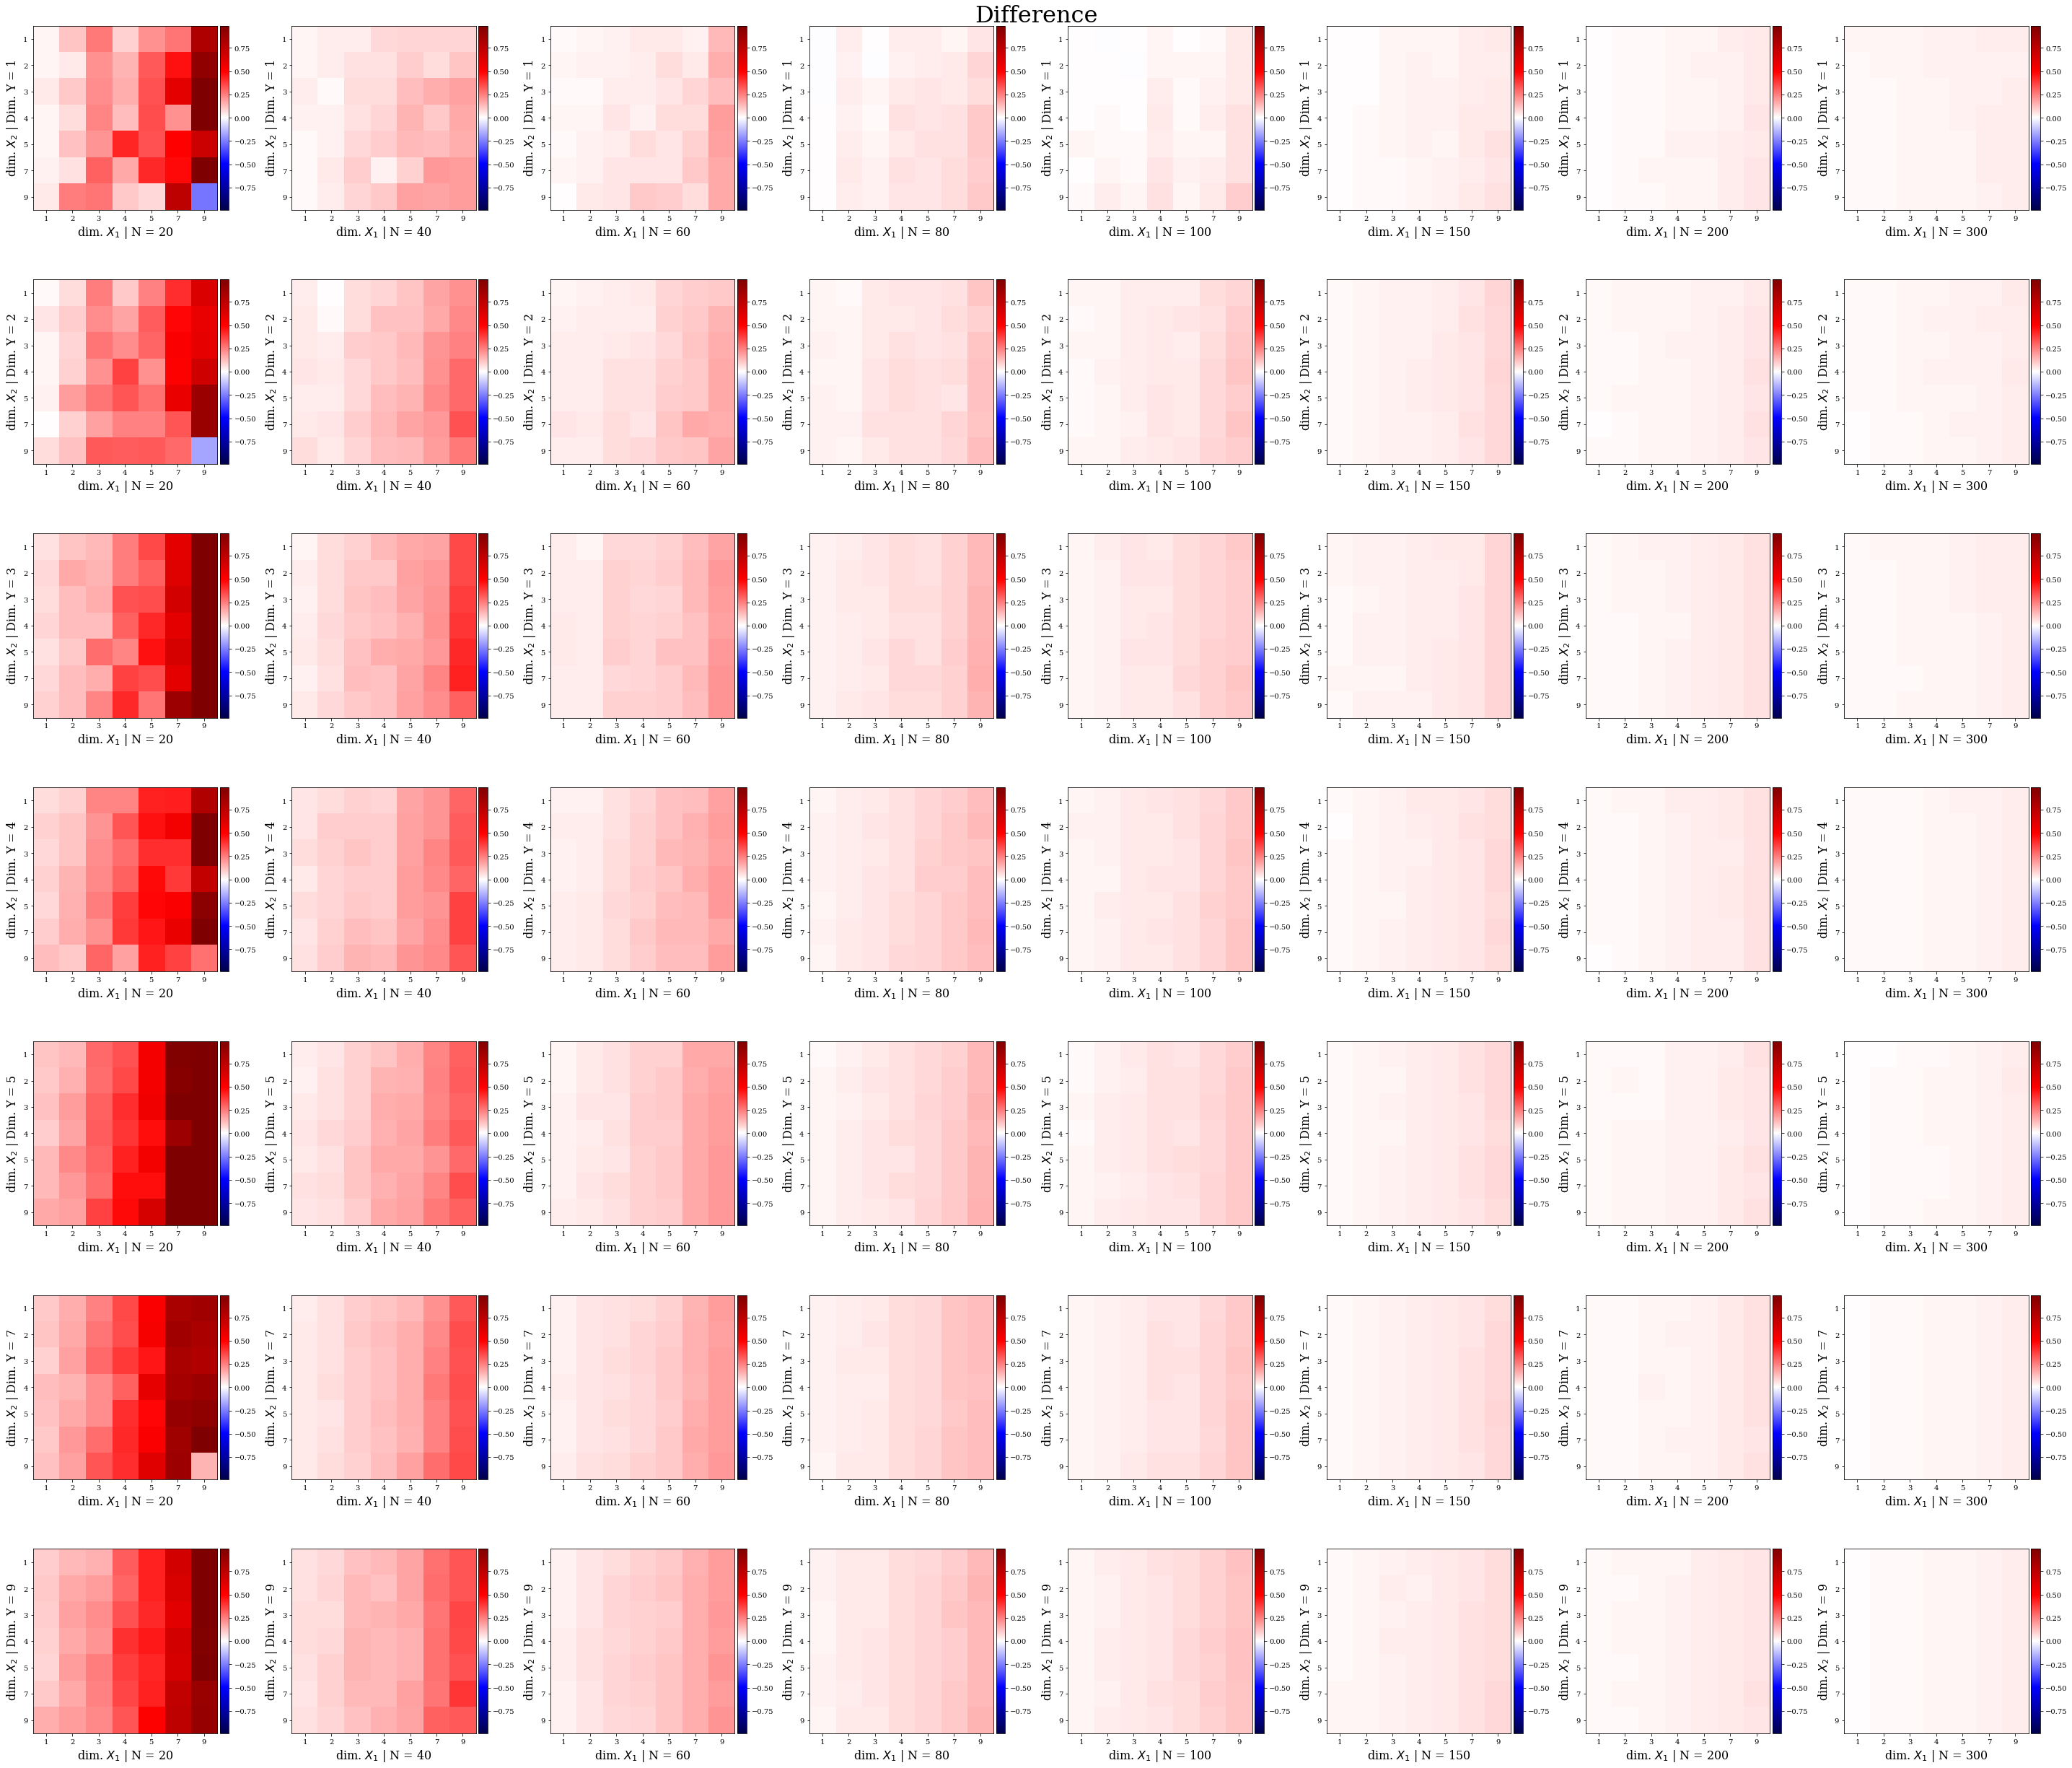

In [12]:
nrow, ncol = da.dims['d_Y'], da.dims['n']
fontsize = 16

fig, ax = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

vmax = np.percentile(mean.difference.values, q=[99])
# vmax = mean.difference.values.max()
vmin = -vmax

for i in range(nrow):
    for j in range(ncol):
        d_Y = da.d_Y.isel(d_Y=i).values.item()
        n = da.n.isel(n=j).values.item()
        array = mean.sel(n=n, d_Y=d_Y).difference.values.squeeze()
        im = ax[i, j].imshow(array, vmin=vmin, vmax=vmax, cmap='seismic')
        ax[i, j].set_xticks(list(range(da.dims['d_X1'])))
        ax[i, j].set_xticklabels(da.d_X1.values)
        ax[i, j].set_xlabel(f'dim. $X_1$ | N = {n}', fontsize=fontsize)
        ax[i, j].set_yticks(list(range(da.dims['d_X2'])))
        ax[i, j].set_yticklabels(da.d_X2.values)
        ax[i, j].set_ylabel(f'dim. $X_2$ | Dim. Y = {d_Y}', fontsize=fontsize)
        colorbar(im)
fig.suptitle('Difference', fontsize=32)
plt.tight_layout()
plt.show()

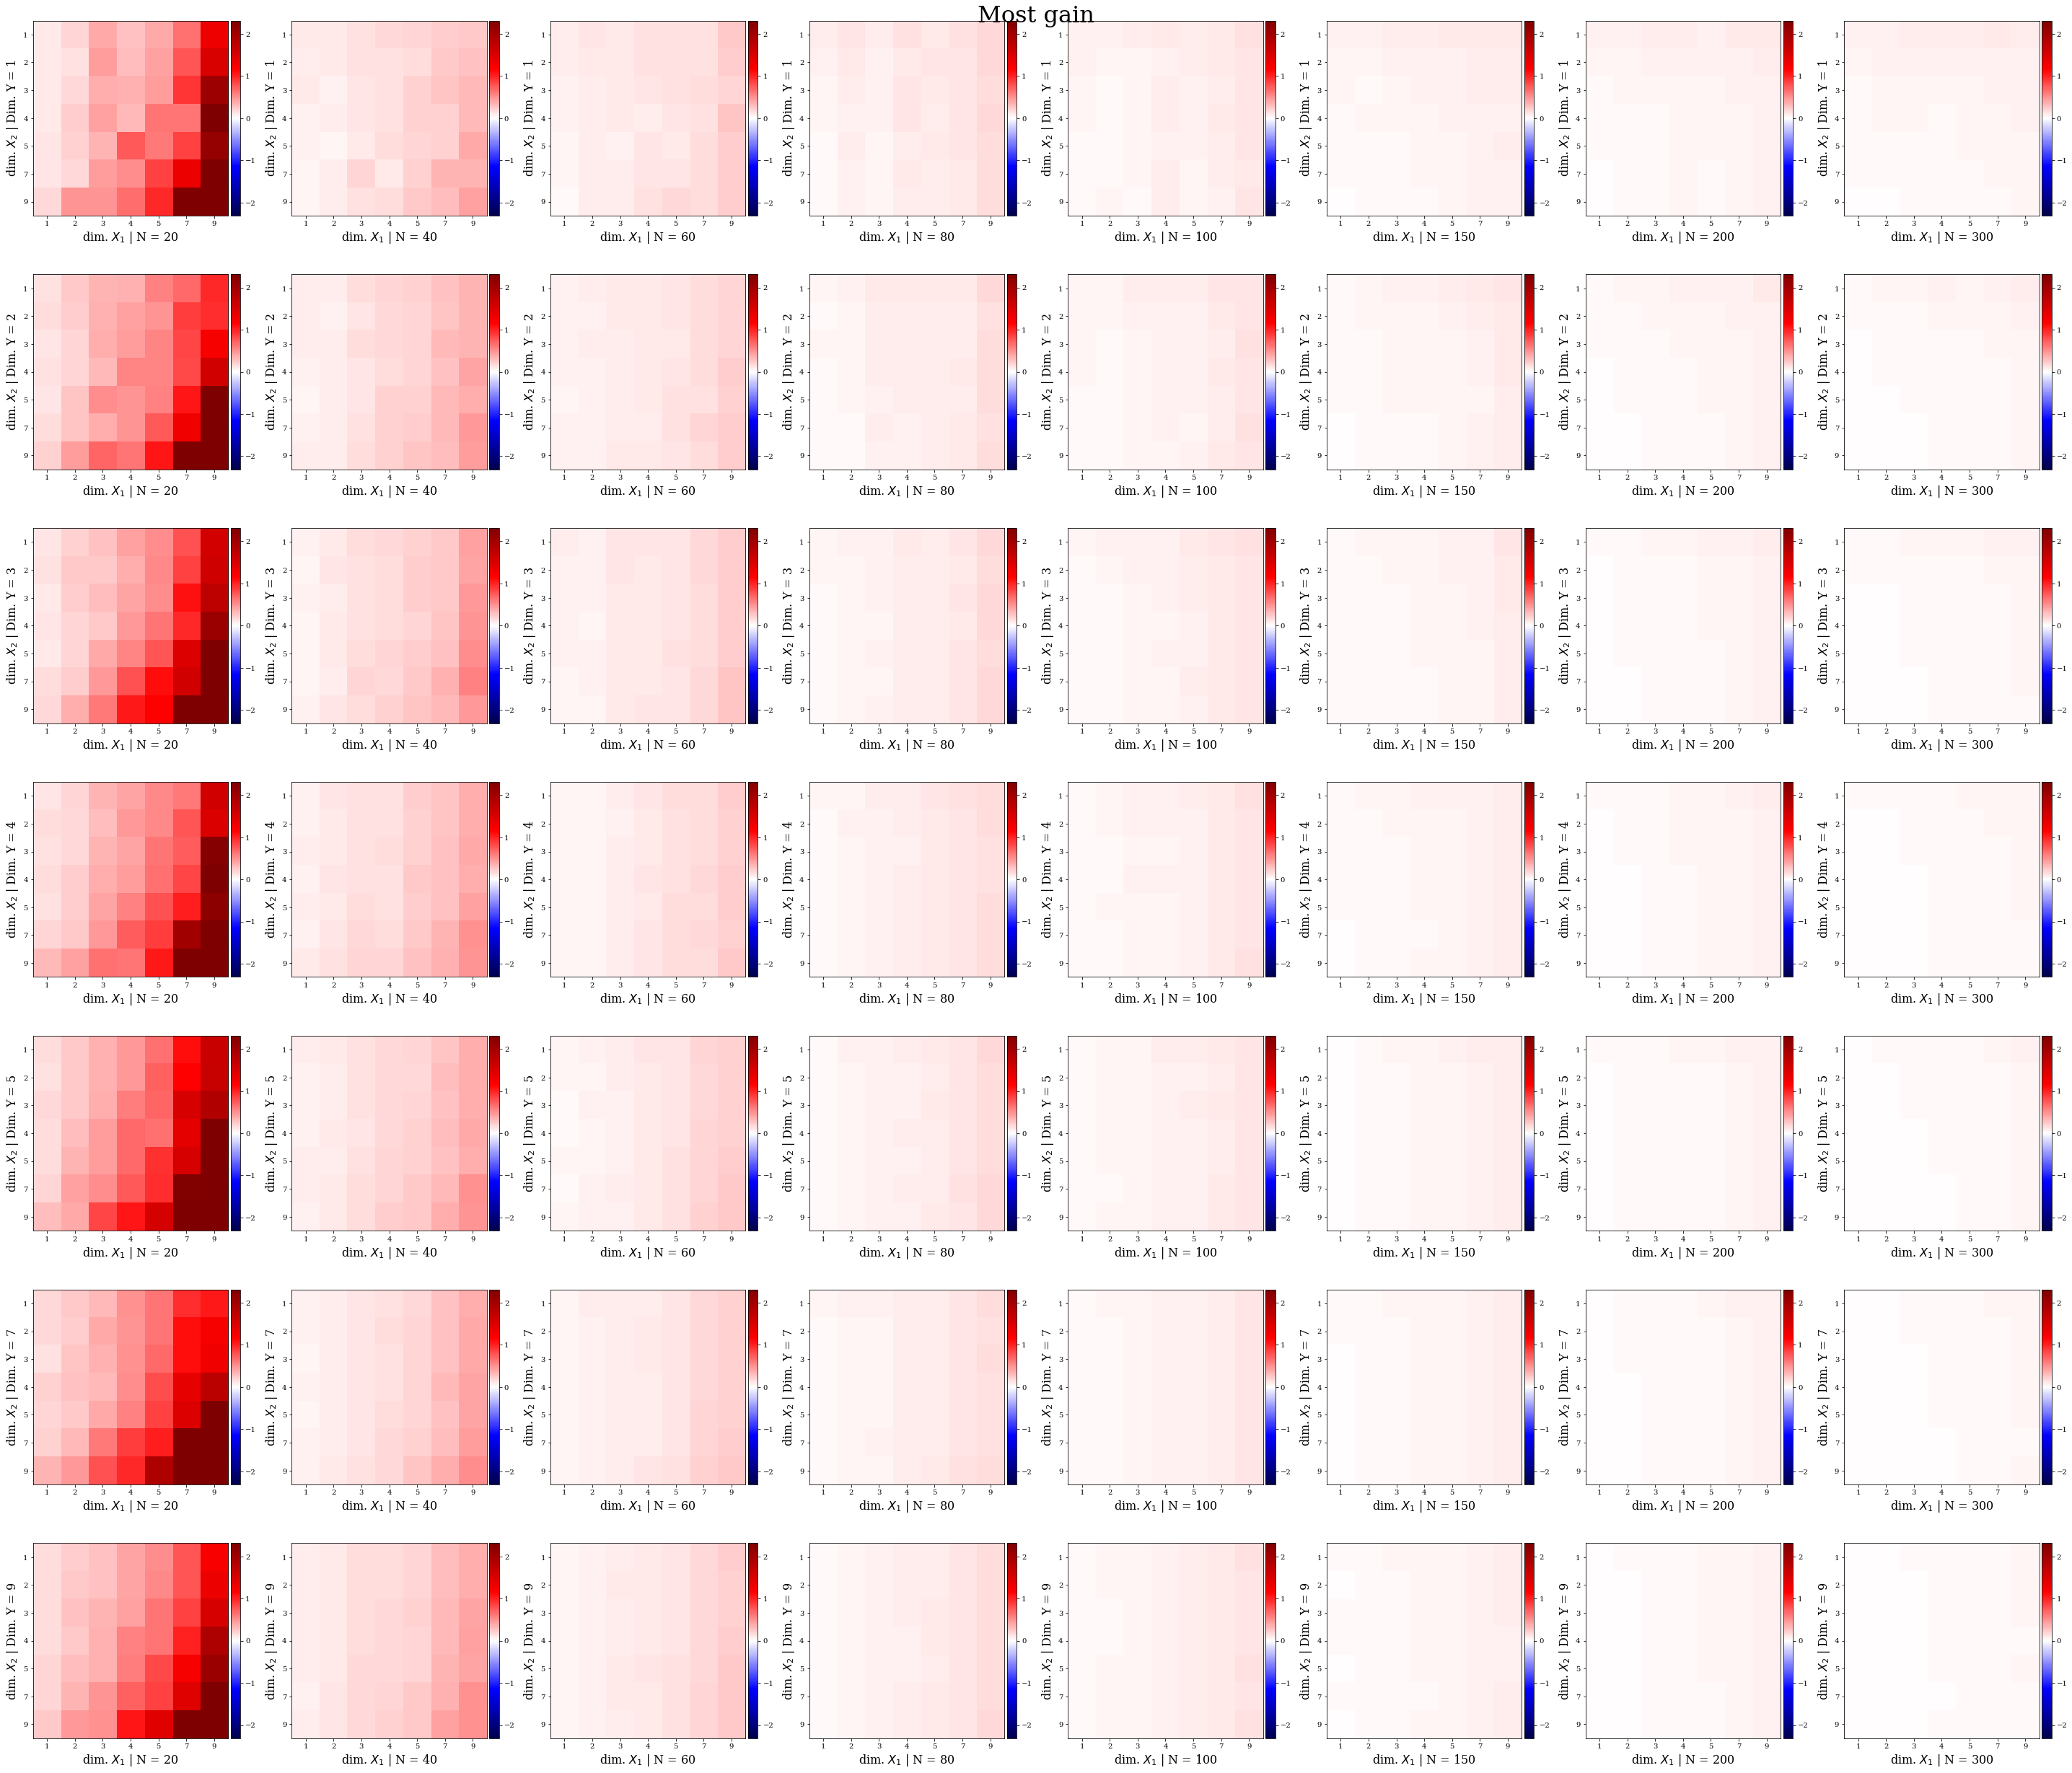

In [11]:
nrow, ncol = da.dims['d_Y'], da.dims['n']
fontsize = 16

fig, ax = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

vmax = np.percentile(mean.most_gain.values, q=[99])
# vmax = mean.most_gain.values.max()
vmin = -vmax

for i in range(nrow):
    for j in range(ncol):
        d_Y = da.d_Y.isel(d_Y=i).values.item()
        n = da.n.isel(n=j).values.item()
        array = mean.sel(n=n, d_Y=d_Y).most_gain.values.squeeze()
        im = ax[i, j].imshow(array, vmin=vmin, vmax=vmax, cmap='seismic')
        ax[i, j].set_xticks(list(range(da.dims['d_X1'])))
        ax[i, j].set_xticklabels(da.d_X1.values)
        ax[i, j].set_xlabel(f'dim. $X_1$ | N = {n}', fontsize=fontsize)
        ax[i, j].set_yticks(list(range(da.dims['d_X2'])))
        ax[i, j].set_yticklabels(da.d_X2.values)
        ax[i, j].set_ylabel(f'dim. $X_2$ | Dim. Y = {d_Y}', fontsize=fontsize)
        colorbar(im)
fig.suptitle('Most gain', fontsize=32)
plt.tight_layout()
plt.show()

In [2]:
da = xr.open_dataset('outputs/dev/linear/cv-search-scores.nc')

In [3]:
da

<xarray.Dataset>
Dimensions:     (d_X1: 7, d_X2: 7, d_Y: 7, n: 8, seed: 20, semi_prop: 1)
Coordinates:
  * d_X1        (d_X1) int64 1 2 3 4 5 7 9
  * d_X2        (d_X2) int64 1 2 3 4 5 7 9
  * d_Y         (d_Y) int64 1 2 3 4 5 7 9
  * n           (n) int64 20 40 60 80 100 150 200 300
  * seed        (seed) int64 2 3 5 7 11 13 17 19 23 ... 41 43 47 53 59 61 67 71
  * semi_prop   (semi_prop) float64 0.0
Data variables:
    collider    (d_X1, d_X2, d_Y, n, seed, semi_prop) float64 ...
    difference  (d_X1, d_X2, d_Y, n, seed, semi_prop) float64 ...
    linreg      (d_X1, d_X2, d_Y, n, seed, semi_prop) float64 ...
    most_gain   (d_X1, d_X2, d_Y, n, seed, semi_prop) float64 ...
Attributes:
    fill_value:  nan

In [4]:
mean, std = da.mean(['seed']), da.std(['seed'])

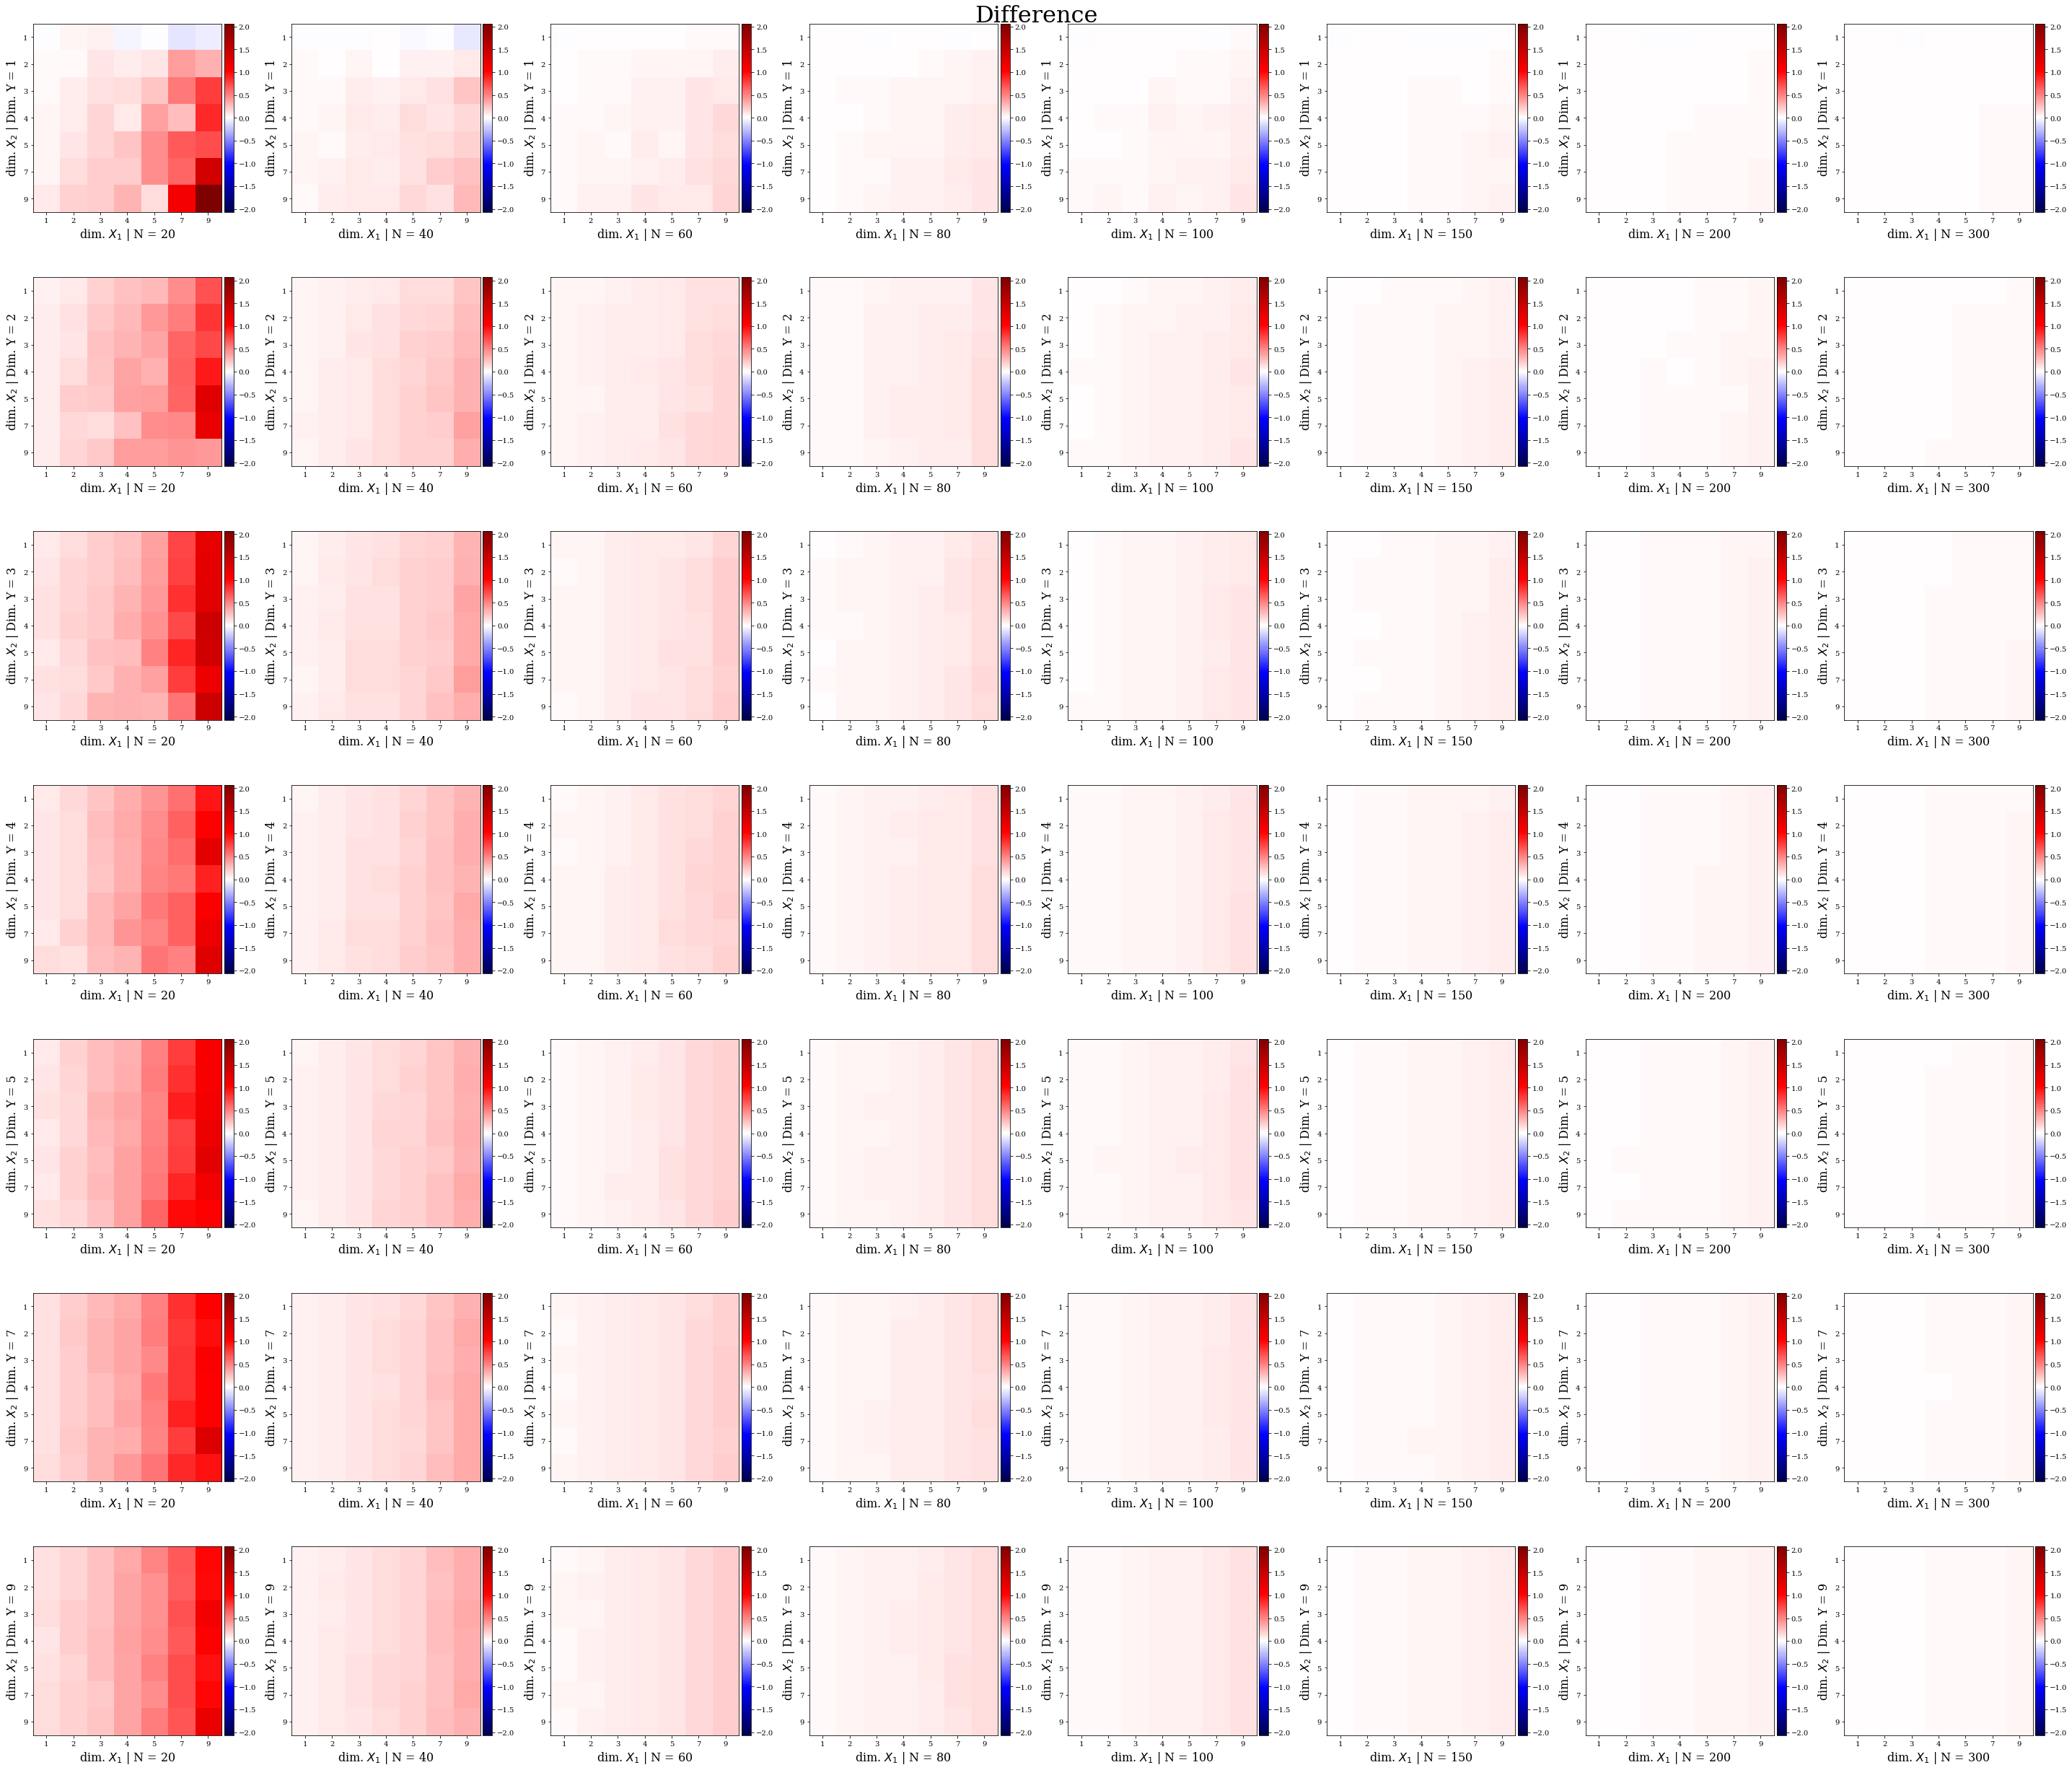

In [31]:
nrow, ncol = da.dims['d_Y'], da.dims['n']
fontsize = 16

fig, ax = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

vmax = np.percentile(mean.difference.values, q=[99])
vmax = mean.difference.values.max()
vmin = -vmax

for i in range(nrow):
    for j in range(ncol):
        d_Y = da.d_Y.isel(d_Y=i).values.item()
        n = da.n.isel(n=j).values.item()
        array = mean.sel(n=n, d_Y=d_Y).difference.values.squeeze()
        im = ax[i, j].imshow(array, vmin=vmin, vmax=vmax, cmap='seismic')
        ax[i, j].set_xticks(list(range(da.dims['d_X1'])))
        ax[i, j].set_xticklabels(da.d_X1.values)
        ax[i, j].set_xlabel(f'dim. $X_1$ | N = {n}', fontsize=fontsize)
        ax[i, j].set_yticks(list(range(da.dims['d_X2'])))
        ax[i, j].set_yticklabels(da.d_X2.values)
        ax[i, j].set_ylabel(f'dim. $X_2$ | Dim. Y = {d_Y}', fontsize=fontsize)
        colorbar(im)
fig.suptitle('Difference', fontsize=32)
plt.tight_layout()
plt.show()

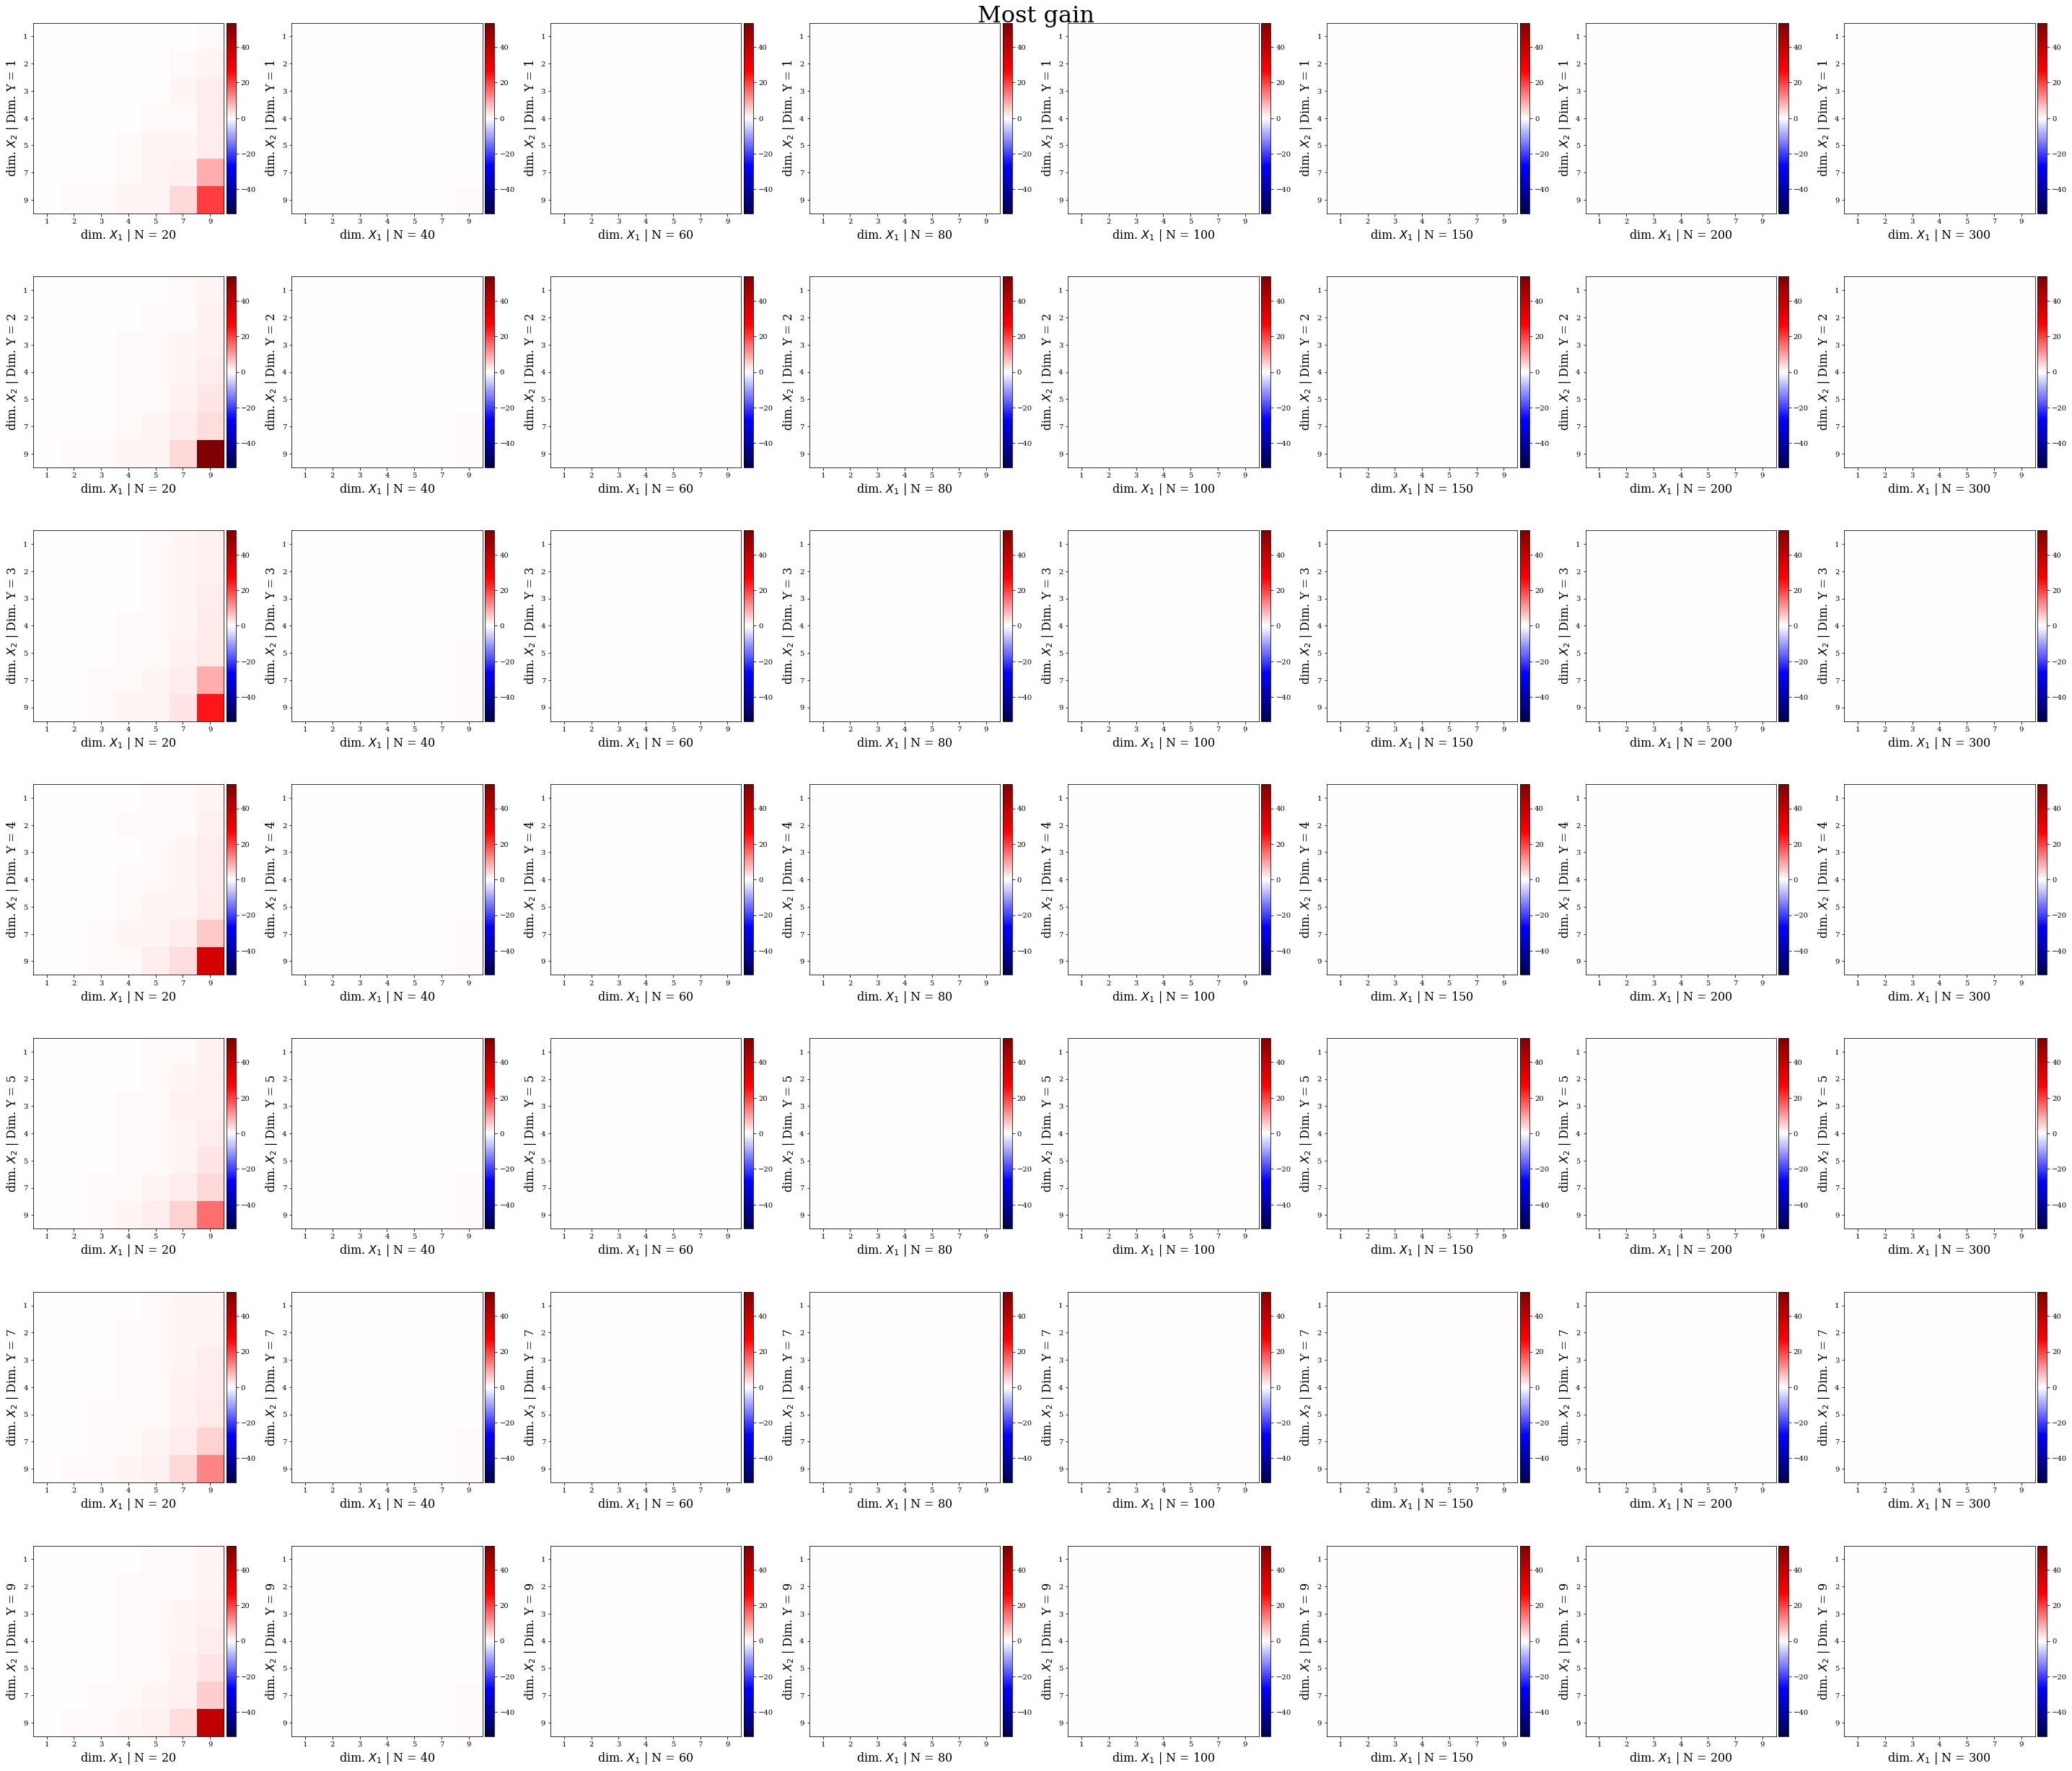

In [30]:
nrow, ncol = da.dims['d_Y'], da.dims['n']
fontsize = 16

fig, ax = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

vmax = np.percentile(mean.most_gain.values, q=[99])
vmax = mean.most_gain.values.max()
vmin = -vmax

for i in range(nrow):
    for j in range(ncol):
        d_Y = da.d_Y.isel(d_Y=i).values.item()
        n = da.n.isel(n=j).values.item()
        array = mean.sel(n=n, d_Y=d_Y).most_gain.values.squeeze()
        im = ax[i, j].imshow(array, vmin=vmin, vmax=vmax, cmap='seismic')
        ax[i, j].set_xticks(list(range(da.dims['d_X1'])))
        ax[i, j].set_xticklabels(da.d_X1.values)
        ax[i, j].set_xlabel(f'dim. $X_1$ | N = {n}', fontsize=fontsize)
        ax[i, j].set_yticks(list(range(da.dims['d_X2'])))
        ax[i, j].set_yticklabels(da.d_X2.values)
        ax[i, j].set_ylabel(f'dim. $X_2$ | Dim. Y = {d_Y}', fontsize=fontsize)
        colorbar(im)
fig.suptitle('Most gain', fontsize=32)
plt.tight_layout()
plt.show()